<a href="https://colab.research.google.com/github/dhanshri8625/CODSOFT/blob/main/MOVIE_RATING_PREDICTION_WITH_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd
uploaded = files.upload()
df = pd.read_csv("IMDb Movies India.csv", encoding="latin1")
df.head()


Saving IMDb Movies India.csv to IMDb Movies India (1).csv


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
import re
def extract_year(val):
    if pd.isna(val):
        return None
    s = str(val)
    match = re.search(r'(\d{4})', s)
    return int(match.group(1)) if match else None

# Apply function
df["Year_clean"] = df["Year"].apply(extract_year)

# Check results
df[["Year", "Year_clean"]].head(10)


,Year,Year_clean
0,NaN,NaN
1,(2019),2019.0
2,(2021),2021.0
3,(2019),2019.0
4,(2010),2010.0
5,(1997),1997.0
6,(2005),2005.0
7,(2008),2008.0
8,(2012),2012.0
9,(2014),2014.0


In [ ]:
def extract_duration(val):
    if pd.isna(val):
        return None
    s = str(val)
    match = re.search(r'(\d+)', s)  # extract digits
    return int(match.group(1)) if match else None

df["Duration_min"] = df["Duration"].apply(extract_duration)

df[["Duration", "Duration_min"]].head(10)


,Duration,Duration_min
0,NaN,NaN
1,109 min,109.0
2,90 min,90.0
3,110 min,110.0
4,105 min,105.0
5,147 min,147.0
6,142 min,142.0
7,59 min,59.0
8,82 min,82.0
9,116 min,116.0


In [ ]:
def clean_votes(val):
    if pd.isna(val):
        return None
    s = str(val).replace(",", "")  # remove commas
    return int(s) if s.isdigit() else None

df["Votes_clean"] = df["Votes"].apply(clean_votes)

df[["Votes", "Votes_clean"]].head(10)


,Votes,Votes_clean
0,NaN,NaN
1,8,8.0
2,NaN,NaN
3,35,35.0
4,NaN,NaN
5,827,827.0
6,"1,086",1086.0
7,NaN,NaN
8,326,326.0
9,11,11.0


from matplotlib import pyplot as plt
_df_0['Votes_clean'].plot(kind='hist', bins=20, title='Votes_clean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Votes').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Votes_clean'].plot(kind='line', figsize=(8, 4), title='Votes_clean')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['Votes'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='Votes_clean', y='Votes', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

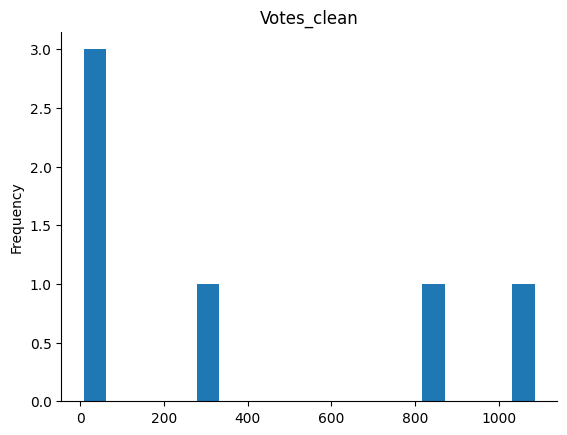

In [ ]:
from matplotlib import pyplot as plt
_df_0['Votes_clean'].plot(kind='hist', bins=20, title='Votes_clean')
plt.gca().spines[['top', 'right',]].set_visible(False)

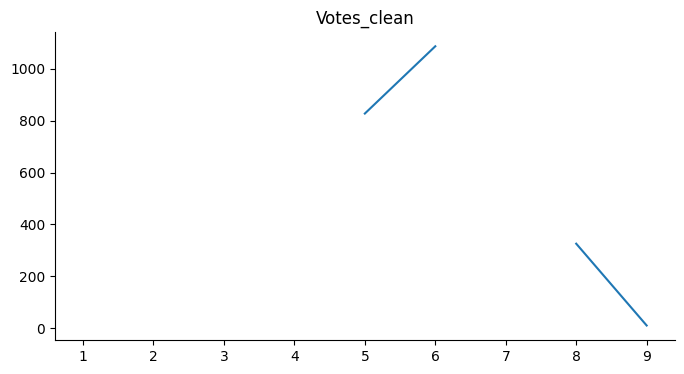

In [ ]:
from matplotlib import pyplot as plt
_df_2['Votes_clean'].plot(kind='line', figsize=(8, 4), title='Votes_clean')
plt.gca().spines[['top', 'right']].set_visible(False)

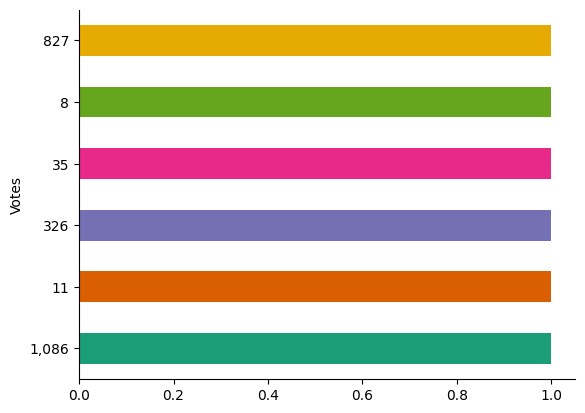

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Votes').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

/tmp/ipython-input-2929316140.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(_df_3, x='Votes_clean', y='Votes', inner='stick', palette='Dark2')


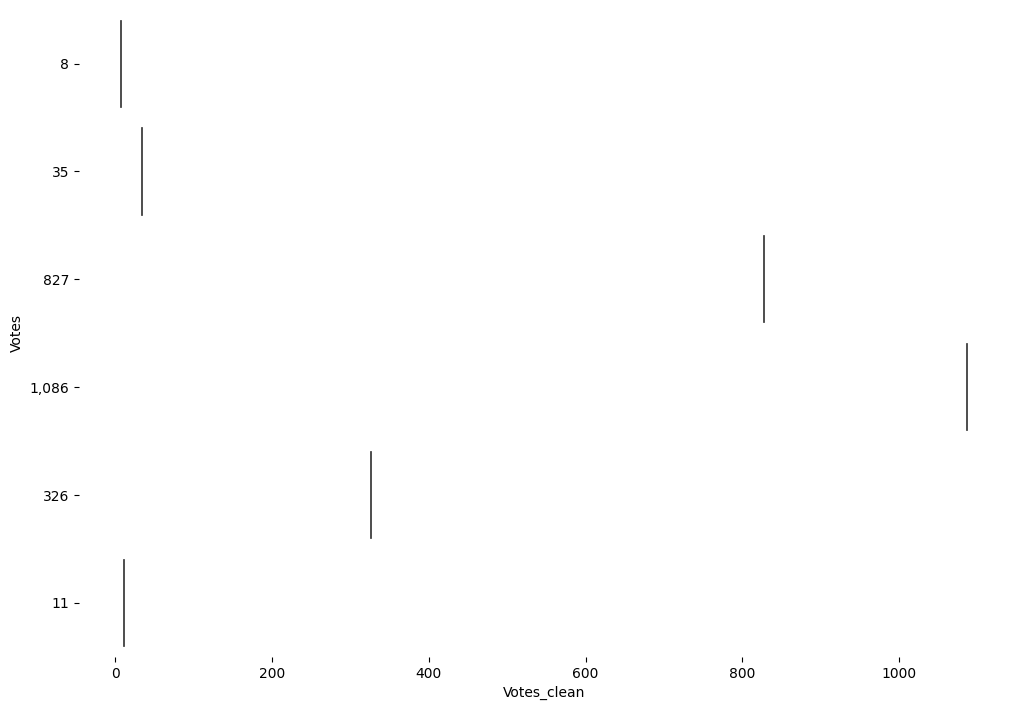

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['Votes'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='Votes_clean', y='Votes', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
df = df[~df["Rating"].isna()].copy()
df.shape


(7919, 13)

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

# Split genre string into list
df["Genre_list"] = df["Genre"].fillna("").apply(lambda x: [g.strip() for g in str(x).split(",") if g.strip() != ""])

# Apply MultiLabelBinarizer (One-Hot encoding for genres)
mlb = MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(df["Genre_list"])

# Create dataframe with genre dummy columns
df_genre = pd.DataFrame(genre_encoded, columns=mlb.classes_, index=df.index)

# Merge with main df
df = pd.concat([df, df_genre], axis=1)


In [ ]:
# Encode Director frequency
director_counts = df["Director"].value_counts()
df["Director_enc"] = df["Director"].map(director_counts)

# Encode Actors frequency
for actor_col in ["Actor 1", "Actor 2", "Actor 3"]:
    actor_counts = df[actor_col].value_counts()
    df[actor_col + "_enc"] = df[actor_col].map(actor_counts)


In [ ]:
# Numeric + Encoded
features = ["Year_clean", "Duration_min", "Votes_clean",
            "Director_enc", "Actor 1_enc", "Actor 2_enc", "Actor 3_enc"]

# Add genres
features += list(df_genre.columns)

X = df[features]
y = df["Rating"]

X.shape, y.shape


((7919, 29), (7919,))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.impute import SimpleImputer

# Impute missing values using the mean for numerical features
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


lr = LinearRegression()
lr.fit(X_train_imputed, y_train)

y_pred_lr = lr.predict(X_test_imputed)

print("Linear Regression:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R2 Score:", r2_score(y_test, y_pred_lr))

Linear Regression:
MAE: 0.9775855070569262
RMSE: 1.2315079541658733
R2 Score: 0.18424236601040167


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("\nRandom Forest:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2 Score:", r2_score(y_test, y_pred_rf))



Random Forest:
MAE: 0.8046717434764309
RMSE: 1.0693439947480672
R2 Score: 0.38493420760653874


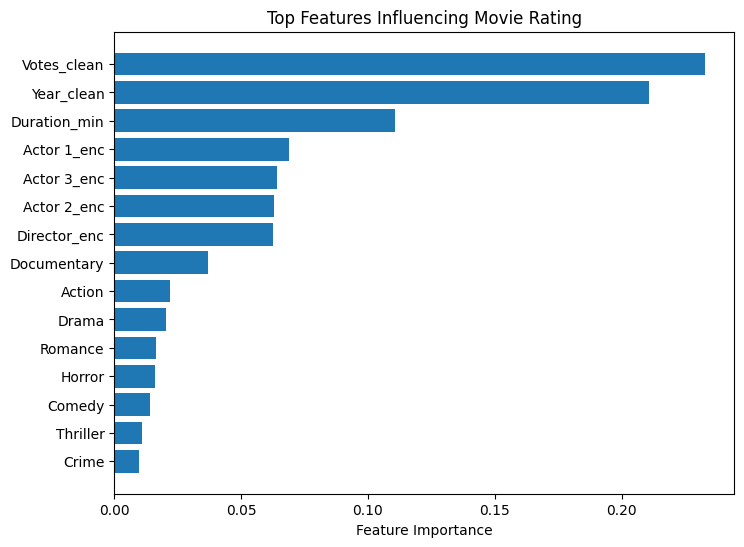

In [ ]:
import matplotlib.pyplot as plt

importances = rf.feature_importances_
indices = np.argsort(importances)[-15:]  # top 15 features

plt.figure(figsize=(8,6))
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Feature Importance")
plt.title("Top Features Influencing Movie Rating")
plt.show()
